<a href="https://colab.research.google.com/github/sahaakash432/Eventlyapplication/blob/main/Salary_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title of Project  Salary prediction using Linear Regression

In [44]:
import pandas as pd

In [11]:
from google.colab import files
uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data (1).csv


In [13]:
dataset=pd.read_csv("Salary_Data.csv")

In [14]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [15]:
dataset.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [16]:
dataset.info

<bound method DataFrame.info of     YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0>

In [17]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [20]:
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, 1].values


print('Shape of X=',X.shape)
print('Shape of Y=',Y.shape)

Shape of X= (30, 1)
Shape of Y= (30,)


In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=0)

print('Shape of X_train =', X_train.shape)
print('Shape of Y_train =', Y_train.shape)
print('Shape of X_test =', X_test.shape)
print('Shape of Y_test =', Y_test.shape)

Shape of X_train = (24, 1)
Shape of Y_train = (24,)
Shape of X_test = (6, 1)
Shape of Y_test = (6,)


In [22]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

In [23]:
print(X_train)

[[ 1.75832984]
 [-0.40973925]
 [ 0.09356251]
 [ 1.10016601]
 [-0.83560996]
 [ 0.01613147]
 [-0.7194634 ]
 [-0.21616165]
 [ 1.21631257]
 [ 0.6742953 ]
 [-1.45505827]
 [ 2.10676952]
 [-0.79689444]
 [-1.1066186 ]
 [ 0.32585562]
 [ 0.36457114]
 [-0.52588581]
 [-0.7194634 ]
 [ 1.52603672]
 [-1.18404964]
 [-1.53248931]
 [ 0.79044186]
 [-0.06129957]
 [-0.40973925]]


In [24]:
print(X_test)

[[-1.37762723]
 [ 2.02933848]
 [-0.37102373]
 [-0.44845477]
 [ 1.71961432]
 [ 1.40989017]]


In [25]:
print(Y_train)
print(Y_test)

[112635.  55794.  83088. 101302.  56642.  66029.  64445.  61111. 113812.
  91738.  46205. 121872.  60150.  39891.  81363.  93940.  57189.  54445.
 105582.  43525.  39343.  98273.  67938.  56957.]
[ 37731. 122391.  57081.  63218. 116969. 109431.]


In [26]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [27]:
lr.coef_

array([24053.85556857])

In [28]:
lr.intercept_

73886.20833333333

In [29]:
print(Y_train)

[112635.  55794.  83088. 101302.  56642.  66029.  64445.  61111. 113812.
  91738.  46205. 121872.  60150.  39891.  81363.  93940.  57189.  54445.
 105582.  43525.  39343.  98273.  67938.  56957.]


In [30]:
lr.predict([X_test[0,:]])

array([40748.96184072])

In [31]:
Y_predict=lr.predict(X_test)
print(Y_predict)

[ 40748.96184072 122699.62295594  64961.65717022  63099.14214487
 115249.56285456 107799.50275317]


In [32]:
Y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431.])

In [33]:
lr.score(X_test,Y_test)

0.988169515729126

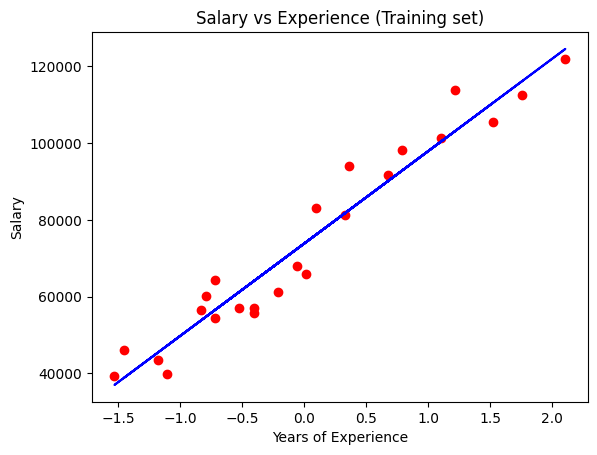

In [34]:
# Visualising the Training set results 
import matplotlib.pyplot as plt
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, lr.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


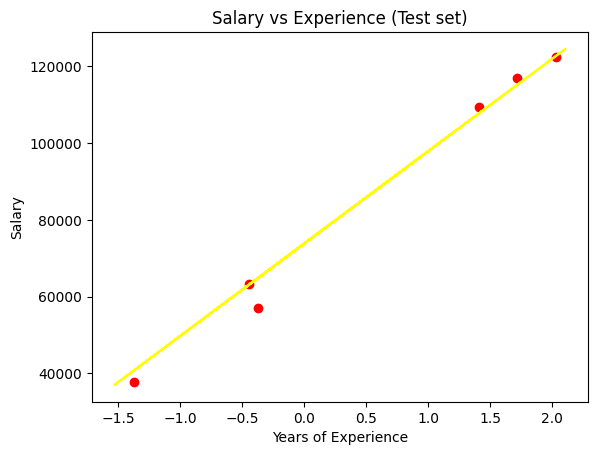

In [35]:
# Visualising the Test set results
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_train, lr.predict(X_train), color = 'yellow')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


In [36]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(Y_test,Y_predict)
print(mae)

2446.172369046504


In [37]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_test,Y_predict)
print(mse)

12823412.298126526


In [38]:
inputexp=10
new_X=lr.predict([[inputexp]])
new_X

array([314424.76401899])

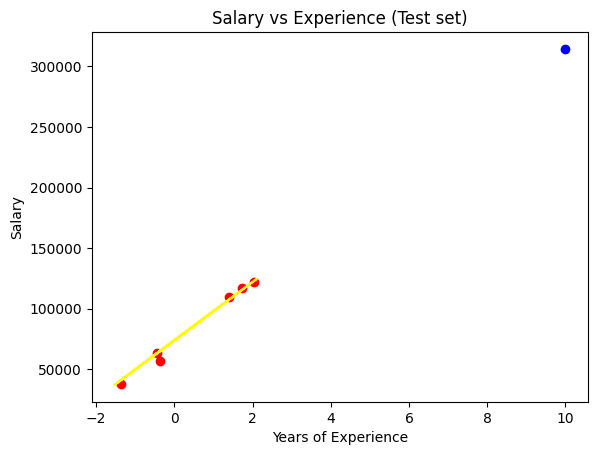

In [39]:
# Visualising the Test set results
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_train, lr.predict(X_train), color = 'yellow')
plt.scatter(inputexp,new_X, color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [40]:
from sklearn.linear_model import Lasso
lr2=Lasso().fit(X_train,Y_train)
y_test_predict1=lr2.predict(X_test)
print(y_test_predict1)
mae2=mean_absolute_error(Y_test,y_test_predict1)
print(mae2)

[ 40750.33946796 122697.59361746  64962.02819395  63099.59059964
 115247.84324023 107798.09286301]
2446.572429413964
